<a href="https://colab.research.google.com/github/github-ashwin/Python/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

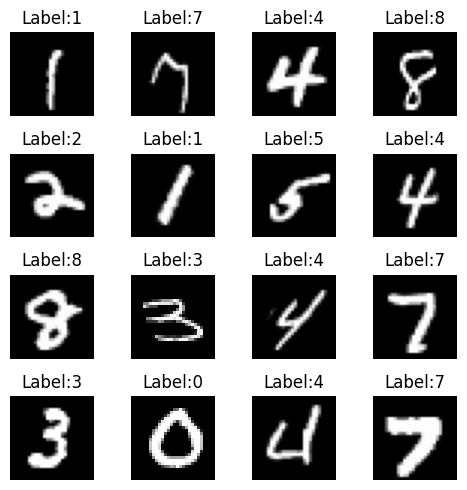

In [6]:
indices = np.random.randint(0,x_train.shape[0],size=16)

fig, axes = plt.subplots(4,4,figsize=(5,5))

axes = axes.flatten()

for i, ax in enumerate(axes):
    image = x_train[indices[i]]
    label = y_train[indices[i]]
    ax.imshow(image,cmap='gray')
    ax.set_title(f"Label:{label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# print(image)
# print(image.shape)

In [7]:
img_rows, img_cols = 28,28
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.8810 - loss: 0.4418 - val_accuracy: 0.9773 - val_loss: 0.0780
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.9798 - loss: 0.0698 - val_accuracy: 0.9813 - val_loss: 0.0589
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9857 - loss: 0.0485 - val_accuracy: 0.9847 - val_loss: 0.0483
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9910 - loss: 0.0309 - val_accuracy: 0.9858 - val_loss: 0.0384
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9930 - loss: 0.0234 - val_accuracy: 0.9843 - val_loss: 0.0420
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9952 - loss: 0.0166 - val_accuracy: 0.9870 - val_loss: 0.0429
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9967 - loss: 0.0124 - val_accuracy: 0.9872 - val_loss: 0.0399
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9971 - loss: 0.0105 - 

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

In [16]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9834 - loss: 0.0973


In [17]:
plt.figure(figsize=(14,5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

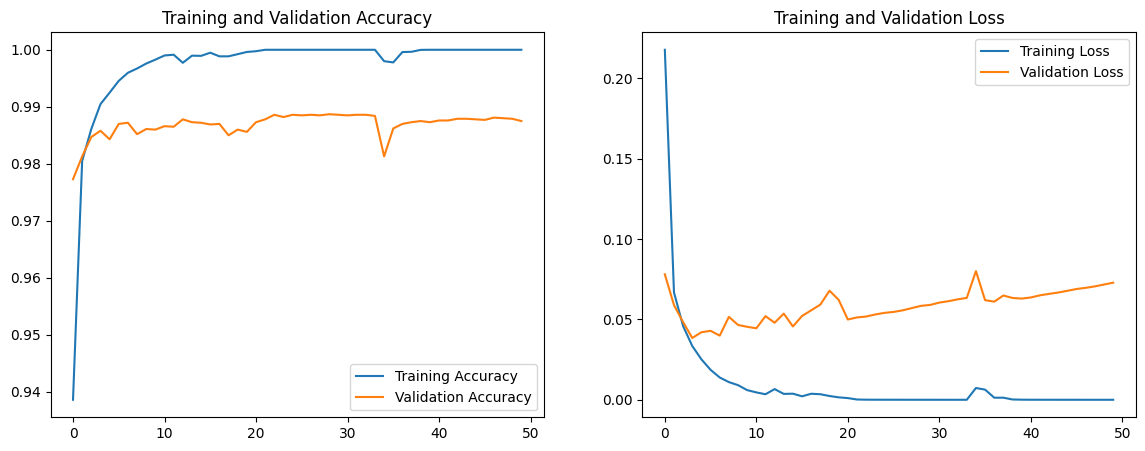

In [18]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()